This section introduces pooling layers, which serve the dual purposes of mitigating the sensitivity of convolutional layers to location and of spatially downsampling representations.

##Maximum Pooling and Average Pooling
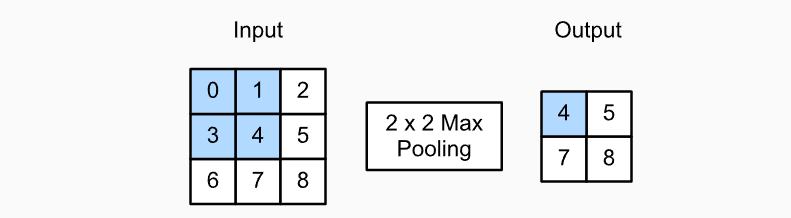
Maximum pooling with a pooling window shape of  2×2 . The shaded portions are the first output element as well as the input tensor elements used for the output computation:  max(0,1,3,4)=4.

In the code below, we implement the forward propagation of the pooling layer in the pool2d function. This function is similar to the corr2d function. However, here we have no kernel, computing the output as either the maximum or the average of each region in the input.

In [2]:
import tensorflow as tf

def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = tf.Variable(tf.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w +1)))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j].assign(tf.reduce_max(X[i: i + p_h, j: j + p_w]))
            elif mode =='avg':
                Y[i, j].assign(tf.reduce_mean(X[i: i + p_h, j: j + p_w]))
    return Y

We can construct the input tensor X in above to validate the output of the two-dimensional maximum pooling layer.

In [3]:
X = tf.constant([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[4., 5.],
       [7., 8.]], dtype=float32)>

Also, we experiment with the average pooling layer.

In [4]:
pool2d(X, (2, 2), 'avg')

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

##Padding and Stride

It is important to note that tensorflow prefers and is optimized for channels-last input.

In [5]:
X = tf.reshape(tf.range(16, dtype=tf.float32), (1, 4, 4, 1))
X

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.]],

        [[ 4.],
         [ 5.],
         [ 6.],
         [ 7.]],

        [[ 8.],
         [ 9.],
         [10.],
         [11.]],

        [[12.],
         [13.],
         [14.],
         [15.]]]], dtype=float32)>

Below, we use a pooling window of shape (3, 3), so we get a stride shape of (3, 3) by default.

In [6]:
pool2d = tf.keras.layers.MaxPool2D(pool_size=[3, 3])
pool2d(X)

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[10.]]]], dtype=float32)>

The stride and padding can be manually specified.

In [7]:
paddings = tf.constant([[0, 0], [1,0], [1,0], [0,0]])
X_padded = tf.pad(X, paddings, "CONSTANT")
pool2d = tf.keras.layers.MaxPool2D(pool_size=[3, 3], padding='valid',
                                   strides=2)
pool2d(X_padded)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[ 5.],
         [ 7.]],

        [[13.],
         [15.]]]], dtype=float32)>

Of course, we can specify an arbitrary rectangular pooling window and specify the padding and stride for height and width, respectively.

##Multiple Channels
Below, we will concatenate tensors X and X + 1 on the channel dimension to construct an input with 2 channels.

Note that this will require a concatenation along the last dimension for TensorFlow due to the channels-last syntax.

In [8]:
X = tf.concat([X, X + 1], 3)  # Concatenate along `dim=3` due to channels-last syntax

As we can see, the number of output channels is still 2 after pooling.

In [9]:
paddings = tf.constant([[0, 0], [1,0], [1,0], [0,0]])
X_padded = tf.pad(X, paddings, "CONSTANT")
pool2d = tf.keras.layers.MaxPool2D(pool_size=[3, 3], padding='valid',
                                   strides=2)
pool2d(X_padded)

<tf.Tensor: shape=(1, 2, 2, 2), dtype=float32, numpy=
array([[[[ 5.,  6.],
         [ 7.,  8.]],

        [[13., 14.],
         [15., 16.]]]], dtype=float32)>

##Summary
* Taking the input elements in the pooling window, the maximum pooling operation assigns the maximum value as the output and the average pooling operation assigns the average value as the output.

* One of the major benefits of a pooling layer is to alleviate the excessive sensitivity of the convolutional layer to location.

* We can specify the padding and stride for the pooling layer.

* Maximum pooling, combined with a stride larger than 1 can be used to reduce the spatial dimensions (e.g., width and height).

* The pooling layer’s number of output channels is the same as the number of input channels.